In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

In [4]:
#Importing data
sk_data = pd.read_csv("/Users/callumrobinson/Documents/Masters/Skills/Group 2/articles.B2M.csv")
print(sk_data)

         PMID                                              Title  \
0    10575721  [Computer-assisted preoperative planning of kn...   
1    10617805  [Urogenital amyloidosis: clinico-pathological ...   
2    10656443  Serum beta-2 microglobulin levels are a signif...   
3    10790290  Exposure of Daudi cells to low-frequency magne...   
4    10793017  Effects of dialyzer reuse on the permeability ...   
..        ...                                                ...   
660  37889281  Artificial intelligence in early detection and...   
661  37972698  Screening the optimal housekeeping genes (HKGs...   
662  38048169  Proteomics Analysis of Serum Reveals Potential...   
663  38053293  Highly efficient genome editing via CRISPR-Cas...   
664  38092161  Identification and validation of stable refere...   

                                              Abstract       ISSN  \
0    The general configuration of replaced knee is ...  0035-1040   
1    Amyloidosis of the genito-urinary tract 

In [5]:
# Finding how many unique names appear multiple times? (surname)
all_names = np.unique(sk_data['FirstAuthorLastname']).tolist()
print(len(all_names))
print(len(sk_data['FirstAuthorLastname']))
print(len(sk_data['FirstAuthorLastname'])-len(all_names))


523
665
142


In [6]:
# Finding how many names appear multiple times (full name)
full_name = sk_data['FirstAuthorForename'] + ' ' + sk_data['FirstAuthorLastname']
print(len(full_name) - len(np.unique(full_name))) #so there are 31 names which appear multiple times
print(full_name)

31
0        E Nerkowski
1        M Esslimani
2        J Rodriguez
3      C A Morehouse
4          J P Matos
           ...      
660     Rupesh Raina
661      Nanjian Luo
662       Taohua Lan
663       A Reum Han
664    Mahanthi Vasu
Length: 665, dtype: object


In [7]:
#which names appear the most frequently
sorted_auth = Counter(full_name)
print(sorted_auth)


Counter({'Mariana Ferreira Leal': 4, 'Meredith C Foster': 3, 'Changhoon Yoo': 3, 'Nontaphat Thongsin': 3, 'Xunwei Wu': 2, 'Taiyi Jin': 2, 'Renfu Yin': 2, 'Yi Ma': 2, 'Robert Rekawiecki': 2, 'C Haas': 2, 'Malgorzata Krzystek-Korpacka': 2, 'Xiuying Li': 2, 'Lesley A Inker': 2, 'I-Hua Chen': 2, 'Kellie B Haworth': 2, 'F M McGovern': 2, 'Shean-Jaw Chiou': 2, 'Johannes Breyer': 2, 'Yu Du': 2, 'Benjamin J Feinberg': 2, 'Gilar Gorji-Bahri': 2, 'Maria Rasmussen': 2, 'Swati Agrawal': 2, 'Guo-Hua Wang': 2, 'Esben Iversen': 2, 'Xiaomeng Hu': 2, 'E Nerkowski': 1, 'M Esslimani': 1, 'J Rodriguez': 1, 'C A Morehouse': 1, 'J P Matos': 1, 'R Fonseca': 1, 'J B Lopez': 1, 'V Scudla': 1, 'K Ohashi': 1, 'H Zhou': 1, 'J E Dickens': 1, 'N Korolev': 1, 'Sharon L Mount': 1, 'Peter D Lee': 1, 'Guido Tricot': 1, 'José Luis Bedini': 1, 'Torben Moos': 1, 'P Moreau': 1, 'Avital Lev': 1, 'D M Lillington': 1, 'D Barbaric': 1, 'H Zhang': 1, 'Simona Gatto': 1, 'Christopher R E McEvoy': 1, 'E Beillard': 1, 'George T Joh

In [11]:
#Removing authors who only appear once
multi_auth = Counter(x for x in sorted_auth.elements() if sorted_auth[x] > 1)
print(multi_auth)

Counter({'Mariana Ferreira Leal': 4, 'Meredith C Foster': 3, 'Changhoon Yoo': 3, 'Nontaphat Thongsin': 3, 'Xunwei Wu': 2, 'Taiyi Jin': 2, 'Renfu Yin': 2, 'Yi Ma': 2, 'Robert Rekawiecki': 2, 'C Haas': 2, 'Malgorzata Krzystek-Korpacka': 2, 'Xiuying Li': 2, 'Lesley A Inker': 2, 'I-Hua Chen': 2, 'Kellie B Haworth': 2, 'F M McGovern': 2, 'Shean-Jaw Chiou': 2, 'Johannes Breyer': 2, 'Yu Du': 2, 'Benjamin J Feinberg': 2, 'Gilar Gorji-Bahri': 2, 'Maria Rasmussen': 2, 'Swati Agrawal': 2, 'Guo-Hua Wang': 2, 'Esben Iversen': 2, 'Xiaomeng Hu': 2})


<function matplotlib.pyplot.show(close=None, block=None)>

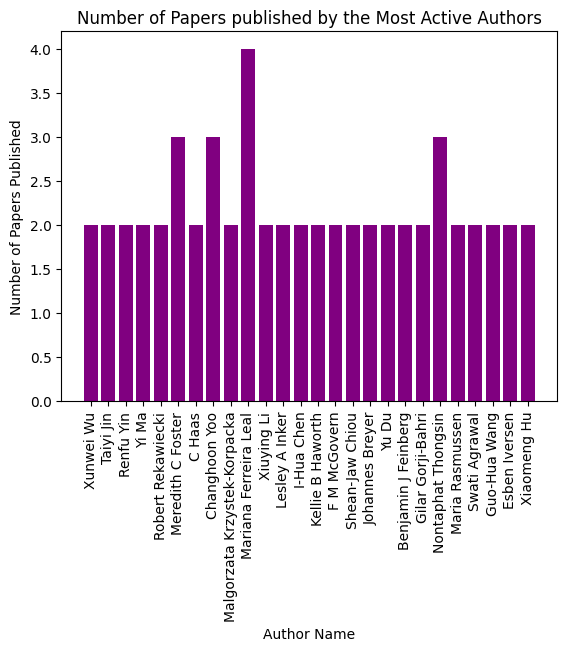

In [17]:
#plot for above data
plt.bar(multi_auth.keys(), multi_auth.values(), color = 'purple')
plt.xticks(rotation = 90)
plt.xlabel('Author Name')
plt.ylabel('Number of Papers Published')
plt.title('Number of Papers published by the Most Active Authors')
plt.show


In [8]:
#Authors (top 5)
auth_data = pd.read_csv('/Users/callumrobinson/Documents/Masters/Skills/Group 2/authors.B2M.csv')